<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/Exercise_Medicon%2BDose%2BTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------
# **Medicon Dose Testing**
--------------------------------------------

--------------------
## **Context**
--------------------

Medicon, a pharmaceutical company, has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. **This vaccine was clinically tested last quarter and around 200,000 doses have already been given to people in five batches.**

Now, the sixth batch of doses needs to be tested for their **time of effect** (measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects** such as antibody creation, to manifest), as well as for **quality assurance** (which tells you whether the dose will be able to do a satisfactory job or not).

You are working with the quality assurance team of Medicon and want to understand the quality of the sixth batch so that the company can plan for the next batch of doses.

**Note:** Please note that this is not a clinical trial, the vaccine has already cleared clinical trials. This test is to ensure the quality and effectiveness of the sixth batch.

------------------------
## **Objective**
------------------------

The previous analysis found that a dose is ten times more likely to produce a satisfactory result than not.

<br>

**Note:** Here, a satisfactory job for the vaccine means that the dose **has successfully prevented COVID-19** - which is assumed to have taken place if the person does not show any symptoms or side effects after 14 days have passed since the vaccine dose was administered.


<br>

Q1. The quality assurance team has collected 100 volunteers who were ready for the trial of this new batch, and they have given one dose to each volunteer. Help the team answer the following questions:


a) **Plot the probability distribution** for the number of unsatisfactory doses.

b) What is the probability that **exactly 3 doses will not do a satisfactory job**?

c) What is the probability that **at most 3 doses will not do a satisfactory job** out of 100 selected?


<br>

Q2. The New York city administration wants to buy 200 doses for Healthcare workers who tested positive for COVID-19. They have contacted the company and requested 200 doses. What is the probability that **at least 30 doses will not do a satisfactory job** out of 200 doses?

<br>

Q3. The quality assurance team wants to analyze the **time of effect for doses**. So, they have enlisted help from 50 volunteers with the assistance of the city administration, and gave one dose to each volunteer. Data for these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

a) What is the probability that the time of effect is **less than 11.5 hours**?

b) What is the **90th percentile of time of effect for the doses**?

c) For the effectiveness test of the vaccine, estimate the **range which will contain the population mean (time of effect) with a 95% confidence level.**

## **Importing the necessary libraries**

In [ ]:
# Import the important libraries

import pandas as pd  # Library used for data manipulation and analysis

import numpy as np  # LIbrary used for working with arrays

import matplotlib.pyplot as plt  # Library for visualization

import seaborn as sns  # Library for visualization

%matplotlib inline

import scipy.stats as stats  # This library contains a large number of probability distributions as well as a growing library of statistical functions

In [ ]:
#Mount GDrive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#access dataset from GDrive
path = "/content/drive/MyDrive/Python Course/doses.csv"
drug = pd.read_csv(path)

## **Question 1**

**Q1. The quality assurance team has collected the 100 volunteers who were ready for the trial of this new batch and given one dose to each volunteer. What is the probability that k doses will do a satisfactory job out of 100 doses given to the volunteers?**

The above situation follows the Binomial distribution because we are taking a random sample of 100 doses and each dose either does a satisfactory job or doesn't.


Let's check first whether the assumptions of the binomial distribution are satisfied or not.

*  There are only two possible outcomes (success or failure) for each trial: A dose will do a satisfactory job or not (yes or no).

* Number of trials (n) is fixed: A  sample of size 100 is taken. Each dose in the sample represents a trial.

* Each trial is independent of other trials: It is reasonable to assume that giving a dose to each person is independent.

* The probability of success (p) is the same for each trial: The probability of success for each trial (a dose will not do a satisfactory job) is not known.

Let's find the probability of success of each trial, i.e., a dose will not do a satisfactory job.

Let $p$ be the probability that a dose will not do a satisfactory job.

As we already know, the quality assurance team checked on five batches of doses and found that it is 10 times more likely that a dose will be able to produce a satisfactory result than not. So, the probability that a dose will do a satisfactory job is $10p$.

According to the rules of probability,

$p + 10p = 1$

$=> 11p = 1$

$=> p = 1/11$

$=> p = 0.09$

Hence, the probability of success for each trial (a dose will not do a satisfactory job) is **0.09**.

### **Let's estimate the probability distribution of doses** (binomal)

In [ ]:
#number of trials - # of participants
n = 100

In [ ]:
# Declare p that represents the probability of success, i.e., the probability that a dose will not do a satisfactory job
p = 0.09

In [ ]:
# k = number of volunteers - Declare the different number of doses selected in a NumPy array, noninclusive
k = np.arange(0, 101)

k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# Import the binom function from the scipy library
from scipy.stats import binom

# Use the binom.pmf() function to generate the probability mass function
binomial = binom.pmf(k = k, n = n, p = p)

In [ ]:
binomial

array([8.01935118e-005, 7.93122644e-004, 3.88281470e-003, 1.25444783e-002,
       3.00860701e-002, 5.71304716e-002, 8.94625517e-002, 1.18815257e-001,
       1.36604904e-001, 1.38106057e-001, 1.24295451e-001, 1.00578737e-001,
       7.37761613e-002, 4.93919862e-002, 3.03562992e-002, 1.72130224e-002,
       9.04393005e-003, 4.41965812e-003, 2.01555838e-003, 8.60313523e-004,
       3.44598109e-004, 1.29832882e-004, 4.61094802e-005, 1.54652915e-005,
       4.90725596e-006, 1.47541234e-006, 4.20922794e-007, 1.14096288e-007,
       2.94196474e-008, 7.22392251e-009, 1.69087417e-009, 3.77614579e-010,
       8.05283837e-011, 1.64113789e-011, 3.19846848e-012, 5.96511861e-013,
       1.06519975e-013, 1.82226034e-014, 2.98791675e-015, 4.69782347e-016,
       7.08545353e-017, 1.02550118e-017, 1.42475439e-018, 1.90064347e-019,
       2.43514011e-020, 2.99709552e-021, 3.54410483e-022, 4.02720353e-023,
       4.39783902e-024, 4.61580772e-025, 4.65638625e-026, 4.51491879e-027,
       4.20769059e-028, 3

As you can see, the **binomial** variable is the array of probabilities for the different number of doses that will not do a satisfactory job. Let us visualize the same in the following plot.

**a) Plot the  Probability Distribution**

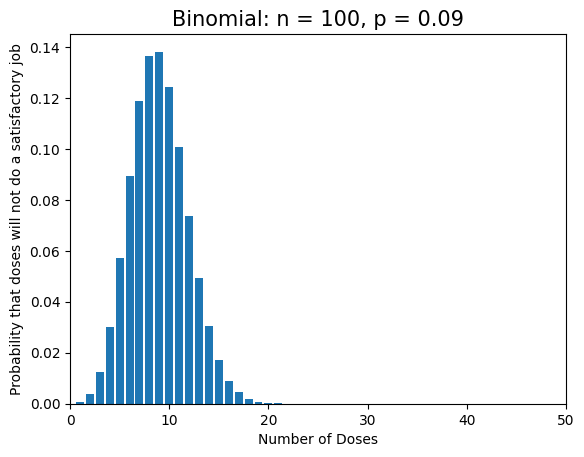

In [ ]:
# Plot the distribution
plt.bar(k, binomial) #different values of k 1-100, numpy array

plt.xlim(0, 50)

plt.title('Binomial: n = %i, p = %.2f' % (n, p), fontsize = 15)

plt.xlabel('Number of Doses')

plt.ylabel('Probability that doses will not do a satisfactory job')

plt.show()

In [ ]:
#Probability that 10 vaccines fail - 14%

**b) What is the probability that at most 10 doses will not do a satisfactory job?

In [ ]:
k[0:11]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
binomial[0:11].sum()

0.7118013717616394

* The probability that exactly 3 doses will not do a satisfactory job is **0.0125**, i.e., 1.25%.

Probability that more than 50 people not get a satisfactory job from vax?

In [ ]:
binomial[51:101].sum()*100

4.9769121730579925e-25

**c) What is the probability that at most 3 doses will not do a satisfactory job out of 100 selected?**

First, we need to calculate $P(X<=3)$. Here, $X$ is the random variable that represents the number of doses that will not do a satisfactory job.

CDF is used to calculate the cumulative probability.

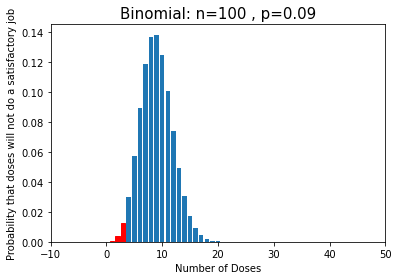

In [ ]:
# Plot the probability distribution
# We are plotting the distributions here to better visualize the calculations
# Ofcourse, you do not 'need' to create the following visualization to answer the question above
# You can directly use the cdf function for probability calculations

barl = plt.bar(k, binomial)

plt.xlim(-10, 50)

plt.title('Binomial: n = %i, p = %.2f' % (n, p), fontsize = 15)

plt.xlabel('Number of Doses')

plt.ylabel('Probability that doses will not do a satisfactory job')

for i in range(0, 4):
    barl[i].set_color('r')

plt.show()

In [ ]:
binomial[:4].sum()

0.017300609121718002

In the above graph, the red region represents $P(X<=3)$.

Let's calculate the probability that out of 100 randomly selected doses, at most 3 will not do a satisfactory job. We will use binom.cdf() for this.

In [ ]:
proba_atmost3 = binom.cdf(k=3, n=n, p=p)
print(proba_atmost3*100)

1.7300609121718067


In [ ]:
# Calculate the cdf
from scipy.stats import binom

prob_atmost3 = binom.cdf(k = 3, n = n, p = p)

print(prob_atmost3)

0.017300609121718068


* The probability of at most 3 doses will not do a satisfactory job is **0.0173**, i.e., 1.73%.

## **Question 2**

**Q2. The New York city administration wants to buy 200 Doses for Healthcare workers who tested positive for COVID-19. They have contacted the company and requested 200 Doses. What is the probability that at least 30 doses will not do a satisfactory job out of 30 doses?**

Let's calculate the probability that at least 30 doses will not do a satisfactory job out of 200 selected.

First, we need to calculate the probability for $P(X>=30)$. Here, $X$ is the random variable that represents doses that will not do a satisfactory job.

CDF is used to calculate the cumulative probability.

In [ ]:
# Declare the sample size in variable n which represents the number of doses selected randomly
n = 200

# Declare p which represents the probability of success, i.e., the probability that a dose will not do a satisfactory job
p = 0.09

# Declare the different number of doses selected in a NumPy array
k = np.arange(0, 201)

k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# Import the required function
from scipy.stats import binom

# Use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k, n = n, p = p)

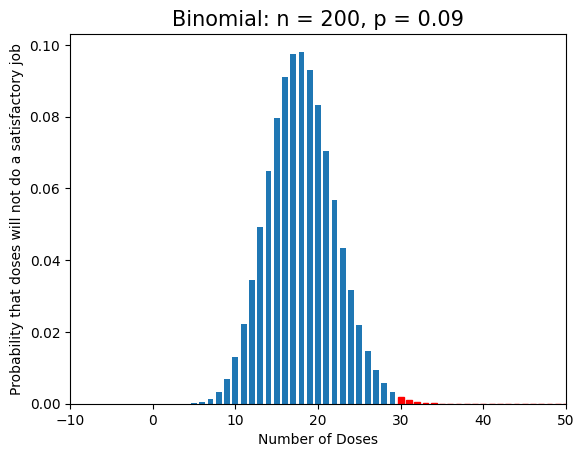

In [ ]:
# Plot the probability distribution
# We are plotting the distributions here to better visualize the calculations
# Ofcourse, you do not 'need' to create the following visualization to answer the question above
# You can directly use the cdf function for probability calculations

barl = plt.bar(k, binomial, width = 0.7)

plt.xlim(-10, 50)

plt.title('Binomial: n = %i, p = %.2f' % (n, p), fontsize = 15)

plt.xlabel('Number of Doses')

plt.ylabel('Probability that doses will not do a satisfactory job')

for i in range(30, 201):
   barl[i].set_color('r')

plt.show()

In the above graph, the red region represents $P(X >= 30)$.

Let's calculate the probability that out of 200 randomly selected doses, at least 30 will not do a satisfactory job.

We will use binom.cdf() for this because $P(X >= 30) = 1 - P(X < 30)$

In [ ]:
binomial.sum()

0.9999999999999996

In [ ]:
binomial[30:].sum()*100

0.39638639235034506

In [ ]:
# Calculate cdf (need 1 - )
prob_atleast30 = 1 - binom.cdf(k = 29, n = 200, p = 0.09)

print(prob_atleast30)

0.003963863923503452


* The probability of at least 30 doses will not do a satisfactory job is **0.003**, i.e., ~0.3%.

## **Question 3**

**Q3. The quality assurance team wants to analyze the time of effect for doses. So, they collected the 50 volunteers with the help of the city administration and gave one dose to each volunteer. Data of these 50 doses are in the 'doses.csv' file.**

### **Data Dictionary**:

We are using the 'doses' dataset, which is randomly generated and has two features.

**drung_serial_number**: It represents the serial number of each dose and is discrete

**time of effect**: It is measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects**, such as antibody creation, to manifest. It is in hours and is continuous.

### **Reading the Sample Data**

In [ ]:
drug

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6
5,990,7.6
6,744,14.0
7,565,7.1
8,145,13.2
9,909,15.5


### **Overview of the dataset**

In [ ]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


* As observed from the result of the info function, there are **no null values** present in the data.

Let's calculate **the mean and standard deviation of the time of effect for the sample doses.**

In [ ]:
drug['time_of_effect'].mean()

13.442

In [ ]:
drug['time_of_effect'].std()

4.745528077537196

<Axes: >

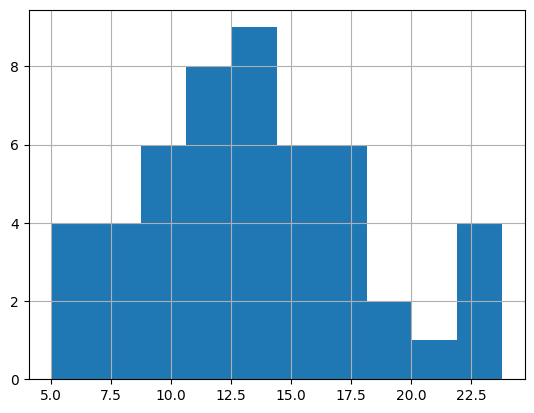

In [ ]:
drug['time_of_effect'].hist()

In [ ]:
# Import the required function
from scipy.stats import norm

# Estimate the mean and standard deviation of the time of effect for the doses
mu = drug['time_of_effect'].mean()

sigma = drug['time_of_effect'].std()

print('The estimated mean is', round(mu, 2))

print('The estimated standard deviation is', round(sigma, 2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


### **Plotting the Distribution**

It will help us analyze the shape of the distribution of time of effect for doses.

<Axes: xlabel='time_of_effect', ylabel='Count'>

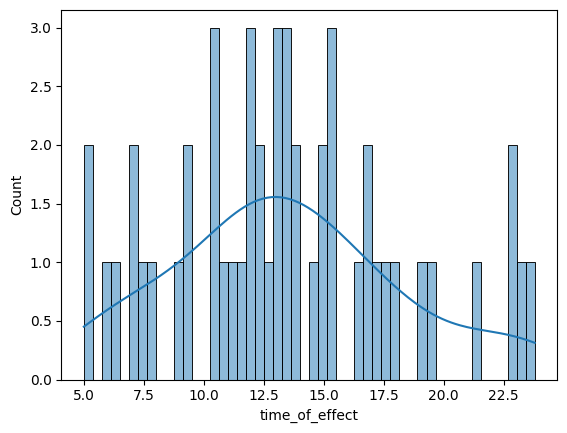

In [ ]:
sns.histplot(drug['time_of_effect'], kde = True, bins=50)

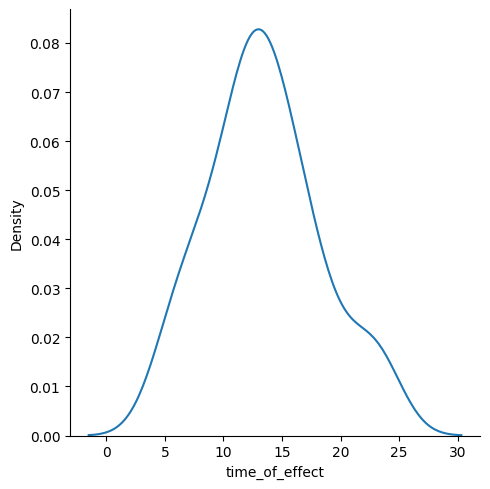

In [ ]:
import seaborn as sns

sns.displot(drug['time_of_effect'], kind = "kde")

* We can observe from the above plot that the shape of the distribution is not perfectly normal because we have just 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

**a) What is the probability that the time of effect is less than 11.5 hours?**

In [ ]:
# Find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob = norm.cdf(11.5, mu, sigma)

print('The probability that a dose will take less than 11.5 hours is', round(prob, 4))

The probability that a dose will take less than 11.5 hours is 0.3412


**b) What is the 90th percentile of the time of effect for doses?**

In [ ]:
perc_90th = norm.ppf(0.90, mu, sigma)

In [ ]:
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2))

The 90th percentile of the time of effect for doses is 19.52


**c) For the effectiveness test of the vaccine, estimate the range which will contain the population mean (time of effect) with a 95% confidence level.**

The population standard deviation is not known here. Therefore, we will calculate the confidence interval using the t-distribution.

In [ ]:
# Import the required function
#T distribution makes a lot of normal distro calculations easy
#can use estimates instead
from scipy.stats import t


In [ ]:
x_bar, s=mu, sigma

n=50
k=n-1

np.round(t.interval(0.99, df=k, loc=x_bar, scale=s/np.sqrt(n)), 2)

#scale formula

array([11.64, 15.24])

**With a 95% confidence level, we can say that the interval [12.09, 14.79] will contain the population mean of the effective time for doses.**

Time of effect being up to 22 hours
by 1-means more than 22 hours

In [ ]:
(1- norm.cdf(22,mu,sigma)) * 100

3.5664119864037835